## Decision Tree Classification Model - Frogs Data


In [1]:
import pandas as pd

# load dataset
frogs_data = pd.read_csv("/content/frogs_data.csv",)
# Factor the variable 'pres_abs' (convert to categorical data)
frogs_data['pres_abs'] = pd.Categorical(frogs_data['pres_abs'])


In [2]:
display(frogs_data.head())

,pres_abs,northing,easting,altitude,distance,NoOfPools,NoOfSites,avrain,meanmin,meanmax
0,1,115,1047,1500,500,232,3,155.000000,3.566667,14.000000
1,1,110,1042,1520,250,66,5,157.666667,3.466667,13.800000
2,1,112,1040,1540,250,32,5,159.666667,3.400000,13.600000
3,1,109,1033,1590,250,9,5,165.000000,3.200000,13.166667
4,1,109,1032,1590,250,67,5,165.000000,3.200000,13.166667


In [3]:
frogs_data.describe()

,northing,easting,altitude,distance,NoOfPools,NoOfSites,avrain,meanmin,meanmax
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,228.188679,1004.584906,1547.075472,1932.547170,25.113208,2.938679,148.092767,3.119969,13.669497
std,63.954459,109.629524,125.058977,2588.596414,26.562747,1.937657,11.996545,0.626604,1.086715
min,84.000000,673.000000,1280.000000,250.000000,1.000000,0.000000,124.666667,2.033333,11.600000
25%,192.000000,977.750000,1480.000000,500.000000,8.000000,1.000000,141.666667,2.566667,12.966667
50%,222.500000,1023.000000,1580.000000,1000.000000,18.000000,3.000000,148.833333,3.000000,13.383333
75%,290.000000,1086.250000,1625.000000,2000.000000,32.000000,4.000000,155.000000,3.566667,14.208333
max,335.000000,1222.000000,1800.000000,18000.000000,232.000000,10.000000,198.333333,4.333333,15.966667


In [4]:
X = frogs_data.drop(columns=['pres_abs'])
y = frogs_data['pres_abs']

In [5]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

seed = 1
# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=seed,max_leaf_nodes=22)

# Fit the model to the training data
dt_classifier.fit(X, y)

# Predict on the test data
y_pred = dt_classifier.predict(X)

# Calculate accuracy on the test data (You can use other metrics as well)
accuracy = accuracy_score(y, y_pred)

# Calculate misclassification error
misclassification_error = 1 - accuracy

print("Misclassification Error:", misclassification_error)


Misclassification Error: 0.07547169811320753


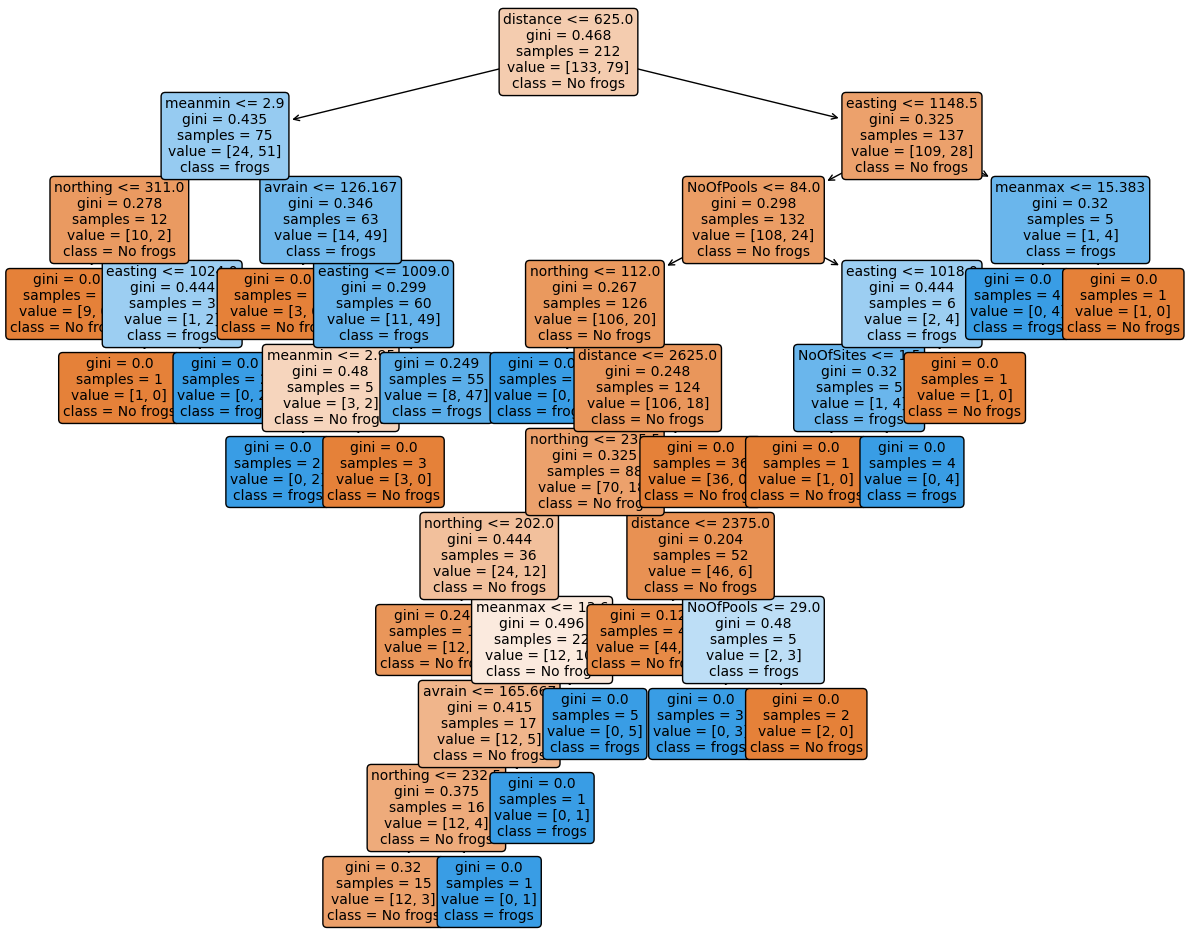

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No frogs', 'frogs'], rounded=True, fontsize=10)
plt.show()

In [7]:
from sklearn.model_selection import LeaveOneOut
# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store predicted target values for each iteration
y_pred_loocv = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Create a new decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=seed,max_leaf_nodes=22)

    # Fit the model on the current training set
    dt_classifier.fit(X_train, y_train)

    # Predict the target value using the test set
    y_pred = dt_classifier.predict(X_test)

    # Store the predicted target value for the current test sample
    y_pred_loocv.append(y_pred[0])

# Calculate accuracy for LOOCV
accuracy_loocv = accuracy_score(y, y_pred_loocv)

# Calculate misclassification error for LOOCV
misclassification_error_loocv = 1 - accuracy_loocv

print("Leave-One-Out Cross-Validation Misclassification Error:", misclassification_error_loocv)


Leave-One-Out Cross-Validation Misclassification Error: 0.23113207547169812


In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation and get the deviance scores for each size
cv_scores = []
for size in range(2, X.shape[1] + 1):
    dt_classifier.set_params(max_leaf_nodes=size)  # Prune the tree with max_leaf_nodes=size
    scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# Find the best-pruned tree size
best_pruned = np.argmin(cv_scores) + 2  # Adding 2 to the index because the range started from 2

print("Best Pruned Tree Size:", best_pruned)

Best Pruned Tree Size: 2


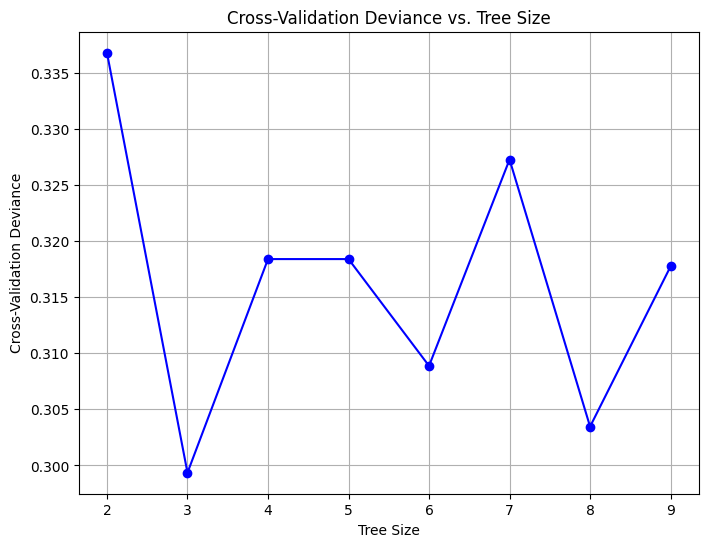

In [9]:
cv_sizes = []
cv_devs = []
for size in range(2, X.shape[1] + 1):
    dt_classifier.set_params(max_leaf_nodes=size)  # Prune the tree with max_leaf_nodes=size
    scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='neg_mean_squared_error')
    mean_dev = -scores.mean()  # Calculate the mean of the negative mean squared error (negate again to get positive)
    cv_sizes.append(size)
    cv_devs.append(mean_dev)

# Plot the cross-validation deviance against tree size
plt.figure(figsize=(8, 6))
plt.plot(cv_sizes, cv_devs, 'bo-')
plt.xlabel('Tree Size')
plt.ylabel('Cross-Validation Deviance')
plt.title('Cross-Validation Deviance vs. Tree Size')
plt.grid(True)
plt.show()

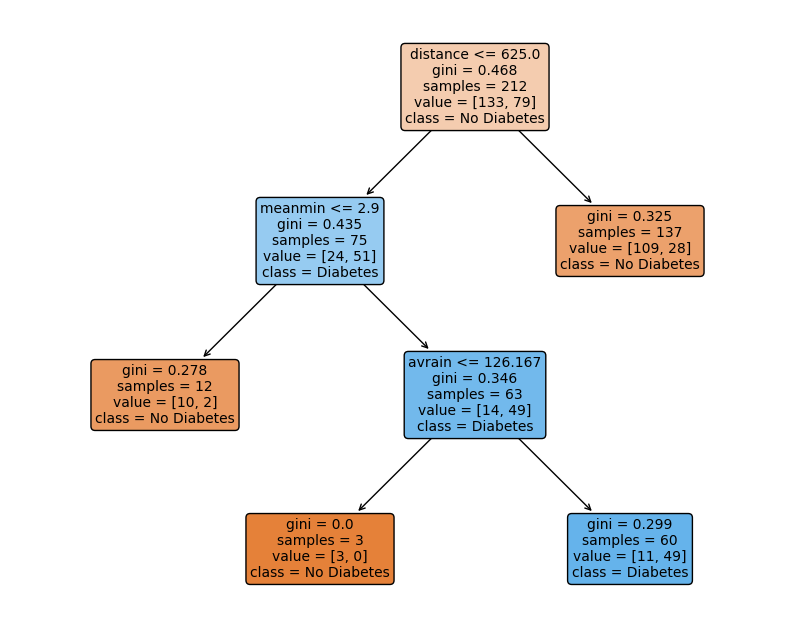

In [10]:
# Prune the tree to obtain the best-pruned tree with max_leaf_nodes = 4
dt_pruned = DecisionTreeClassifier(max_leaf_nodes=4, random_state=seed)
dt_pruned.fit(X, y)

# Plot the best-pruned tree
plt.figure(figsize=(10, 8))
plot_tree(dt_pruned, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True, fontsize=10)
plt.show()


In [11]:

def LOOCV_pruned(data):
    n = len(data)
    tree_pred_fit_pruned = []
    for i in range(n):
        newdata = data.drop(index=i)
        testdata = data.loc[[i]]

        # Create a new decision tree classifier
        dt_classifier = DecisionTreeClassifier(random_state=seed)

        # Fit the model on the current training set
        dt_classifier.fit(newdata.drop(columns=['pres_abs']), newdata['pres_abs'])

        # Prune the tree to obtain the best-pruned tree with max_leaf_nodes = 4
        dt_pruned = DecisionTreeClassifier(max_leaf_nodes=4, random_state=seed)
        dt_pruned.fit(newdata.drop(columns=['pres_abs']), newdata['pres_abs'])

        # Predict the target value using the test set
        y_pred = dt_pruned.predict(testdata.drop(columns=['pres_abs']))

        # Store the predicted target value for the current test sample
        tree_pred_fit_pruned.append(y_pred[0])

    MSE = 1 - accuracy_score(data['pres_abs'], tree_pred_fit_pruned)
    return {'MSE': MSE, 'tree_pred_fit_pruned': tree_pred_fit_pruned}

# Perform LOOCV for the pruned tree and get the tree predictions
test_MSE_pruned = LOOCV_pruned(data=frogs_data)
tree_pred_fit_pruned = test_MSE_pruned['tree_pred_fit_pruned']

# Calculate the table
table_result_pruned = pd.crosstab(index=pd.Series(tree_pred_fit_pruned), columns=frogs_data['pres_abs'])
print(table_result_pruned)
misclassification_error_loocv= (32+15)/212
print("Leave-One-Out Cross-Validation Misclassification Error:", misclassification_error_loocv)

pres_abs    0   1
row_0            
0         118  32
1          15  47
Leave-One-Out Cross-Validation Misclassification Error: 0.22169811320754718


,Feature,Importance
3,distance,0.234985
0,northing,0.184706
1,easting,0.155882
4,NoOfPools,0.111802
7,meanmin,0.094995
6,avrain,0.079630
8,meanmax,0.050767
5,NoOfSites,0.045747
2,altitude,0.041486


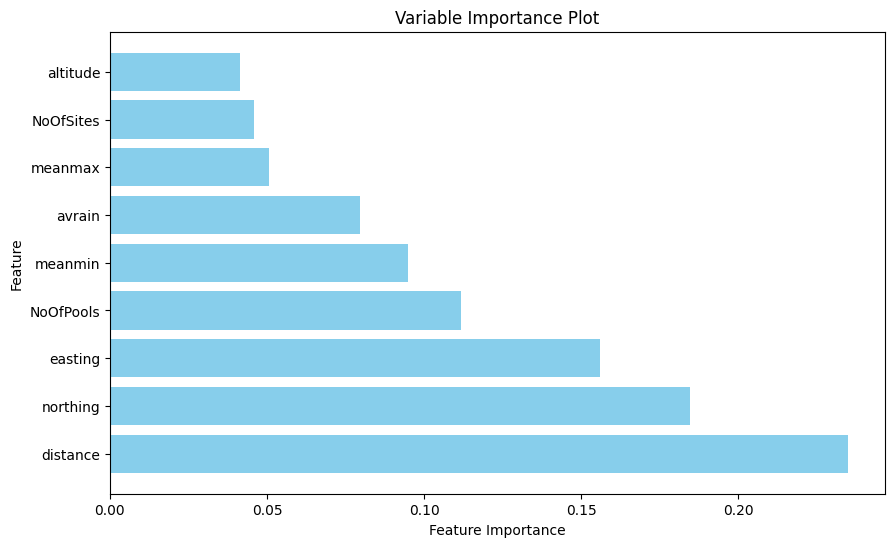

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, max_features=9, random_state=seed)

# Fit the model to the data
rf_classifier.fit(X, y)

# Get the feature importance scores
importance_scores = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

display(importance_df)

# Plot the variable importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Variable Importance Plot')
plt.show()

**Bagging**

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
# Create a BaggingClassifier object with 15 base decision tree classifiers
bag = BaggingClassifier(n_estimators=15, random_state=seed)

# Train the BaggingClassifier on the training data
bag.fit(X, y)

# Make predictions on the test dataset
predictions = bag.predict(X)

# Get the predicted probabilities for each class for the test dataset
predicted_probas = bag.predict_proba(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
def LOOCV_bagging(data):
    loo = LeaveOneOut()
    n = len(data)
    correct_predictions = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a BaggingClassifier with 15 base decision tree classifiers
        bag = BaggingClassifier(n_estimators=15, random_state=seed)

        # Train the BaggingClassifier on the training data
        bag.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = bag.predict(X_test)

        # Check if the prediction is correct and update the count
        if y_pred[0] == y_test.iloc[0]:
            correct_predictions += 1

    # Calculate the misclassification error rate
    misclassification_error_rate = 1 - (correct_predictions / n)
    return misclassification_error_rate

# Perform LOOCV for bagging and calculate the misclassification error rate
misclassification_error_rate = LOOCV_bagging(data=frogs_data)
print("Misclassification Error Rate:", misclassification_error_rate)

Misclassification Error Rate: 0.23113207547169812


**Random Forest**


In [21]:
from xgboost import plot_importance
rf_classifier = RandomForestClassifier(n_estimators=1000, max_features=round(X.shape[0]/3), random_state=seed)

# Fit the model to the data
rf_classifier.fit(X, y)

# Get the feature importance scores
importance_scores = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

     Feature  Importance
3   distance    0.234985
0   northing    0.184706
1    easting    0.155882
4  NoOfPools    0.111802
7    meanmin    0.094995
6     avrain    0.079630
8    meanmax    0.050767
5  NoOfSites    0.045747
2   altitude    0.041486


<Figure size 1000x600 with 0 Axes>

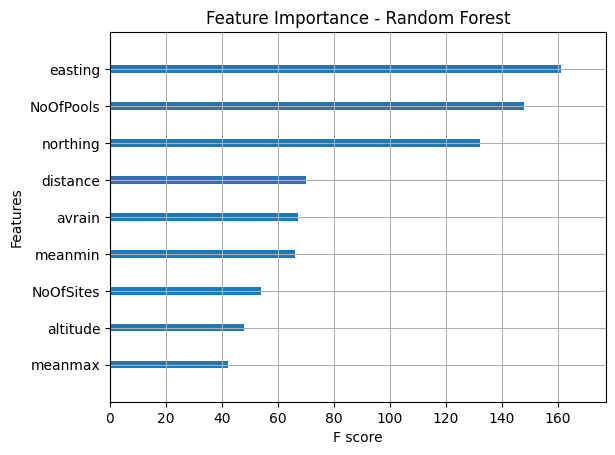

In [22]:
# Convert the Random Forest model to an XGBoost format
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, y)

# Create the feature importance plot using plot_importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', show_values=False)
plt.title('Feature Importance - Random Forest')
plt.show()

In [23]:

def LOOCV_random_forest(data):
    loo = LeaveOneOut()
    n = len(data)
    correct_predictions = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a RandomForestClassifier with mtry=9/3 and ntree=1000
        rf_classifier = RandomForestClassifier(n_estimators=1000, max_features=round(X.shape[0]/3), random_state=seed)

        # Fit the model on the training data
        rf_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rf_classifier.predict(X_test)

        # Check if the prediction is correct and update the count
        if y_pred[0] == y_test.iloc[0]:
            correct_predictions += 1

    # Calculate the misclassification rate
    misclassification_rate = 1 - (correct_predictions / n)
    return misclassification_rate

# Perform LOOCV and calculate the misclassification rate
misclassification_rate = LOOCV_random_forest(data=frogs_data)
print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.21698113207547165


ADABoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Create a decision tree classifier with max_depth=1
dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=seed)

# Create the AdaBoost classifier with 1000 estimators (trees)
boost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=1000, random_state=seed)

# Fit the model to the data
boost_classifier.fit(X, y)

# Make predictions on the data
predictions = boost_classifier.predict(X)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, predictions)
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[[133   0]
 [  0  79]]


In [25]:
import warnings

# Filter out the specific warning message
warnings.filterwarnings("ignore", message="`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.", category=FutureWarning)




def LOOCV1e(data):
    loo = LeaveOneOut()
    n = len(data)
    correct_predictions = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a decision tree classifier with max_depth=1 as the base estimator for AdaBoost
        dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=seed)

        # Create the AdaBoost classifier with 1000 estimators (trees)
        boost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=1000, random_state=seed)

        # Fit the model on the training data
        boost_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = boost_classifier.predict(X_test)

        # Check if the prediction is correct and update the count
        if y_pred[0] == y_test.iloc[0]:
            correct_predictions += 1

    # Calculate the misclassification error rate
    misclassification_rate = 1 - (correct_predictions / n)
    return misclassification_rate

# Perform LOOCV and calculate the misclassification error rate
misclassification_rate = LOOCV1e(data=frogs_data)
print("Misclassification Error Rate:", misclassification_rate)


Misclassification Error Rate: 0.2783018867924528


In [4]:
# Sample data for the table
test_error_rate = {
    'Method': ["un-pruned tree" , "pruned tree" , " bagging" ,"random-forest" ,"boosting"],
    'Miss classification error rate': [0.31132,0.22170, 0.23113,  0.21698, 0.27830],
}

# Create a DataFrame from the data dictionary
df_error = pd.DataFrame(test_error_rate)

# Display the DataFrame (table)
display(df_error)

,Method,Miss classification error rate
0,un-pruned tree,0.31132
1,pruned tree,0.22170
2,bagging,0.23113
3,random-forest,0.21698
4,boosting,0.27830
